In [16]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha = 0.1

def exp_smth(dat, p_cal):
    p_cal = p_cal + alpha*(dat - p_cal)
    return(p_cal)

df1C = pd.read_csv(r'D:\Python\Battery charger\data\Charging data\DATA_RD41.txt')
df0C5 = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD39.txt")
dffh = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD43.txt")
dfsh = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD44.txt")

In [17]:
#Removing inital state

row2cpy = 0
for i in range(20):
    if df1C['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1

init1C = df1C.loc[0:row2cpy-1]
df1C.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if df0C5['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1
init0C5 = df0C5.loc[0:row2cpy-1]
df0C5.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if dfsh['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1

dfsh.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if dffh['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1
initqtr = dffh.loc[0:row2cpy-1]
dffh.drop([0,row2cpy-1], inplace = True)

frames = [dffh, dfsh]
dfC = pd.concat(frames)
print(init0C5)
print(init1C)
print(initqtr)

  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
0         00:00:01       0.039          0.009       0.06       3.6      7.21   
1         00:00:02       0.039          0.009       0.06       3.6      7.22   

   V_+(V)  TEMPERATURE(deg C)  
0   10.86               26.04  
1   10.88               26.01  
  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
0         00:00:01       0.041          0.009       0.06       3.5      6.91   
1         00:00:02       0.041          0.009       0.06       3.5      6.92   

   V_+(V)  TEMPERATURE(deg C)  
0   10.12               29.62  
1   10.12               29.53  
  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
0         00:00:01        0.04          0.009       0.06      3.67      7.27   

   V_+(V)  TEMPERATURE(deg C)  
0   11.01               28.05  


In [18]:
#Measuring time

time1C = np.arange(1, df1C['TIME(hr:min:sec)'].size+1, 1)
time0C5 = np.arange(1, df0C5['TIME(hr:min:sec)'].size+1, 1)
timequatC = np.arange(1, dfC['TIME(hr:min:sec)'].size+1, 1)

In [19]:
#Smoothing datasets

smot_i = []
smot_v = []
smot_tt = []
smot_i.append(df1C['CHARGING_I(A)'].iloc[0])
smot_v.append(df1C['V_+(V)'].iloc[0])
smot_tt.append(df1C['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,df1C['CHARGING_I(A)'].size):
    tm1 = smot_i[i - 1]
    tm1 = exp_smth(df1C['CHARGING_I(A)'].iloc[i], tm1)
    smot_i.append(tm1)

    temp = smot_v[i - 1]
    temp = exp_smth(df1C['V_+(V)'].iloc[i], temp)
    smot_v.append(temp)

    temp = smot_tt[i - 1]
    temp = exp_smth(df1C['TEMPERATURE(deg C)'].iloc[i], temp)
    smot_tt.append(temp)

smot_i = np.array(smot_i)
smot_v = np.array(smot_v)
smot_tt = np.array(smot_tt)

smoth_i = []
smoth_v = []
smot_t = []
smoth_i.append(df0C5['CHARGING_I(A)'].iloc[0])
smoth_v.append(df0C5['V_+(V)'].iloc[0])
smot_t.append(df1C['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,df0C5['CHARGING_I(A)'].size):
    tm1 = smoth_i[i - 1]
    tm1 = exp_smth(df0C5['CHARGING_I(A)'].iloc[i], tm1)
    smoth_i.append(tm1)

    temp = smoth_v[i - 1]
    temp = exp_smth(df0C5['V_+(V)'].iloc[i], temp)
    smoth_v.append(temp)

    temp = smot_t[i - 1]
    temp = exp_smth(df0C5['TEMPERATURE(deg C)'].iloc[i], temp)
    smot_t.append(temp)

smoth_i = np.array(smoth_i)
smoth_v = np.array(smoth_v)
smot_t = np.array(smot_t)

smotQ_i = []
smotQ_v = []
smotQ_t = []
smotQ_i.append(dfC['CHARGING_I(A)'].iloc[0])
smotQ_v.append(dfC['V_+(V)'].iloc[0])
smotQ_t.append(dfC['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,dfC['CHARGING_I(A)'].size):
    tm1 = smotQ_i[i - 1]
    tm1 = exp_smth(dfC['CHARGING_I(A)'].iloc[i], tm1)
    smotQ_i.append(tm1)

    temp = smotQ_v[i - 1]
    temp = exp_smth(dfC['V_+(V)'].iloc[i], temp)
    smotQ_v.append(temp)

    temp = smotQ_t[i - 1]
    temp = exp_smth(dfC['TEMPERATURE(deg C)'].iloc[i], temp)
    smotQ_t.append(temp)

smotQ_i = np.array(smotQ_i)
smotQ_v = np.array(smotQ_v)
smotQ_t = np.array(smotQ_t)

meanI1C = smot_i[:700].mean()
meanV1C = smot_v[700:].mean()
meanI0C5 = smoth_i[:3530].mean()
meanV0C5 = smoth_v[3550:].mean()
meanquatC = smotQ_i[4580:7435].mean()

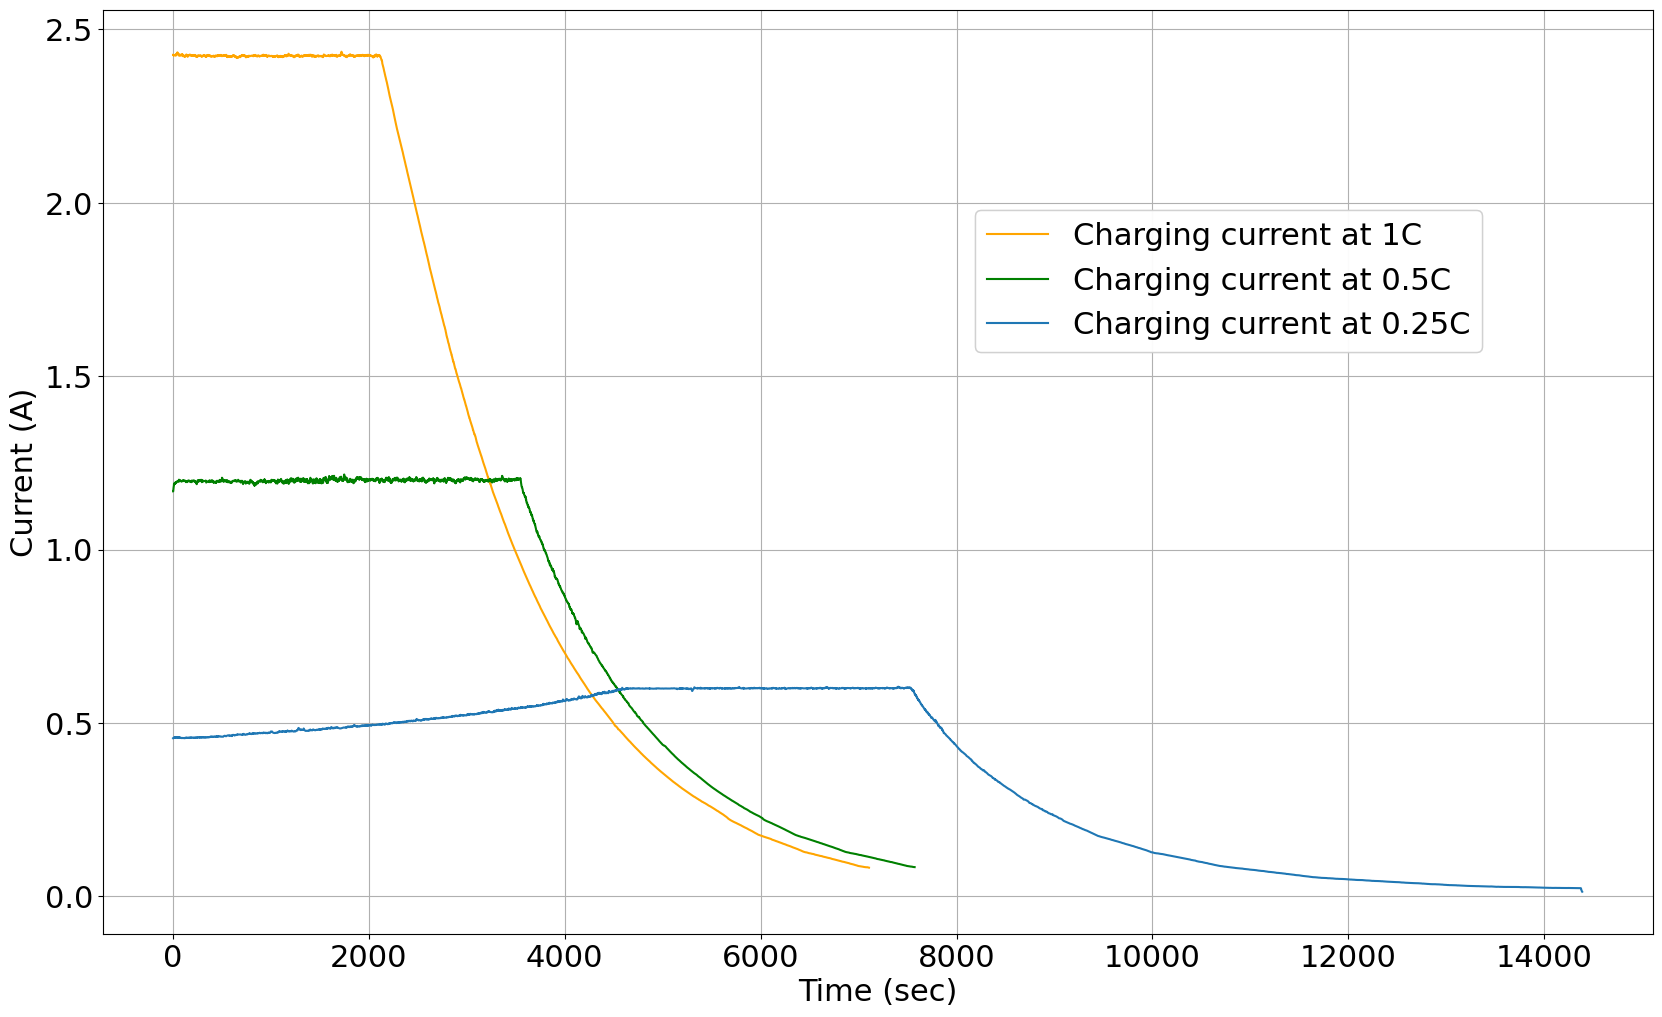

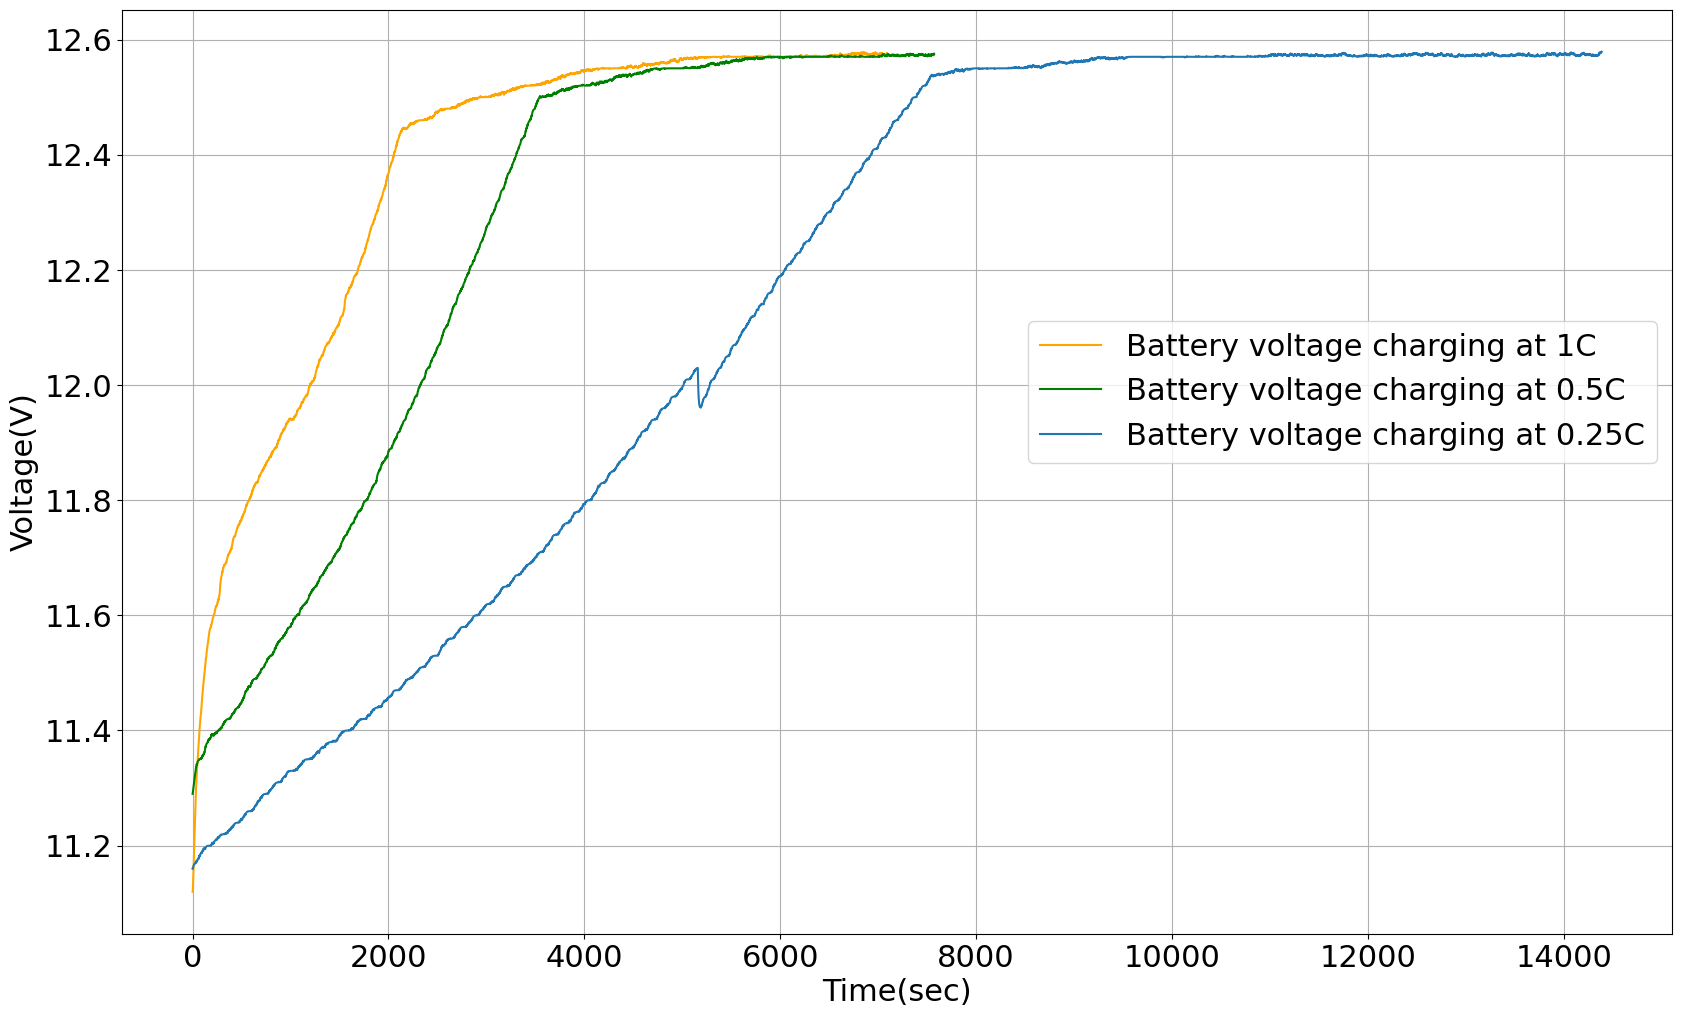

In [20]:
#Charging current and voltage with raw data

fig, ax = plt.subplots(figsize=(20,12))
p1, = ax.plot(time1C, smot_i, label = 'Charging current at 1C', color = 'orange')
p2, = ax.plot(time0C5, smoth_i, label = 'Charging current at 0.5C', color = 'green')
p3, = ax.plot(timequatC, smotQ_i, label = 'Charging current at 0.25C')
ax.set_xlabel('Time (sec)', fontsize = 22)
ax.set_ylabel('Current (A)', fontsize = 22)
ax.tick_params(axis='both', which='major', labelsize=22)
#ax.set_yticklabels(fontsize = 22)
#leg1 = ax.legend(handles = [p1, p2, p3], bbox_to_anchor=(0.94, 1.11), fontsize = 22)
leg1 = ax.legend(handles = [p1, p2, p3], bbox_to_anchor=(0.9, 0.8), fontsize = 22)
ax.add_artist(leg1)
ax.grid(True)

#l1, = ax.plot(np.arange(1, 5000+1, 1), np.full(5000, meanI0C5), color = 'red' , ls = '--')
#ax.text(4000, meanI0C5 + 0.01, r'%.3f A'%(meanI0C5), fontsize=22)
#l2, = ax.plot(np.arange(1, 2000+1, 1), np.full(2000, meanI1C), color = 'red', ls = '--')
#ax.text(800, meanI1C + 0.01, r'%.3f A'%(meanI1C), fontsize=22)
#l5, = ax.plot(timequatC, np.full(timequatC.size, meanquatC), color = 'red', ls = '--')
#ax.text(13000, meanquatC + 0.01, r'%.3f A'%(meanquatC), fontsize=22)


fig2, vax = plt.subplots(figsize=(20,12))
vax.plot(time1C, smot_v, label = 'Battery voltage charging at 1C', color = 'orange')
vax.plot(time0C5, smoth_v, label = 'Battery voltage charging at 0.5C', color = 'green')
vax.plot(timequatC, smotQ_v, label = 'Battery voltage charging at 0.25C')
#vax.plot(time1C, np.full(time1C.size, meanV1C), color = 'black', ls = '--')
vax.set_ylabel('Voltage(V)', fontsize = 22)
vax.set_xlabel("Time(sec)", fontsize = 22)
vax.tick_params(axis='both', which='major', labelsize=22)

#vax.plot(time0C5, np.full(time0C5.size, meanV05C), color = 'red', ls = '--')
vax.legend(loc='upper right', bbox_to_anchor=(1, 0.68), fontsize = 22)

vax.grid(True)

# Get the current reference
#ax = ax.gca()

# Create a Rectangle patch
#rect = patches.Rectangle((5000,12),3200,0.4,linewidth=1,edgecolor='black',facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)


#y = 12.35
#ax.text(5050, y, r'Average 1C current = %.3f A'%meanI1C, fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'Average 0.5C current = %.3f A'%meanI1C, fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'1C charging time = 700 sec', fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'0.5C charging time = 3500 sec', fontsize=14, color = 'black')
plt.show()

[11.29258395 11.29632556 11.299693   11.3027237  11.30545133]
[11.28990541 11.28991487 11.28992338 11.28993104 11.28993794]
[11.29     11.291    11.2919   11.29271  11.294439]


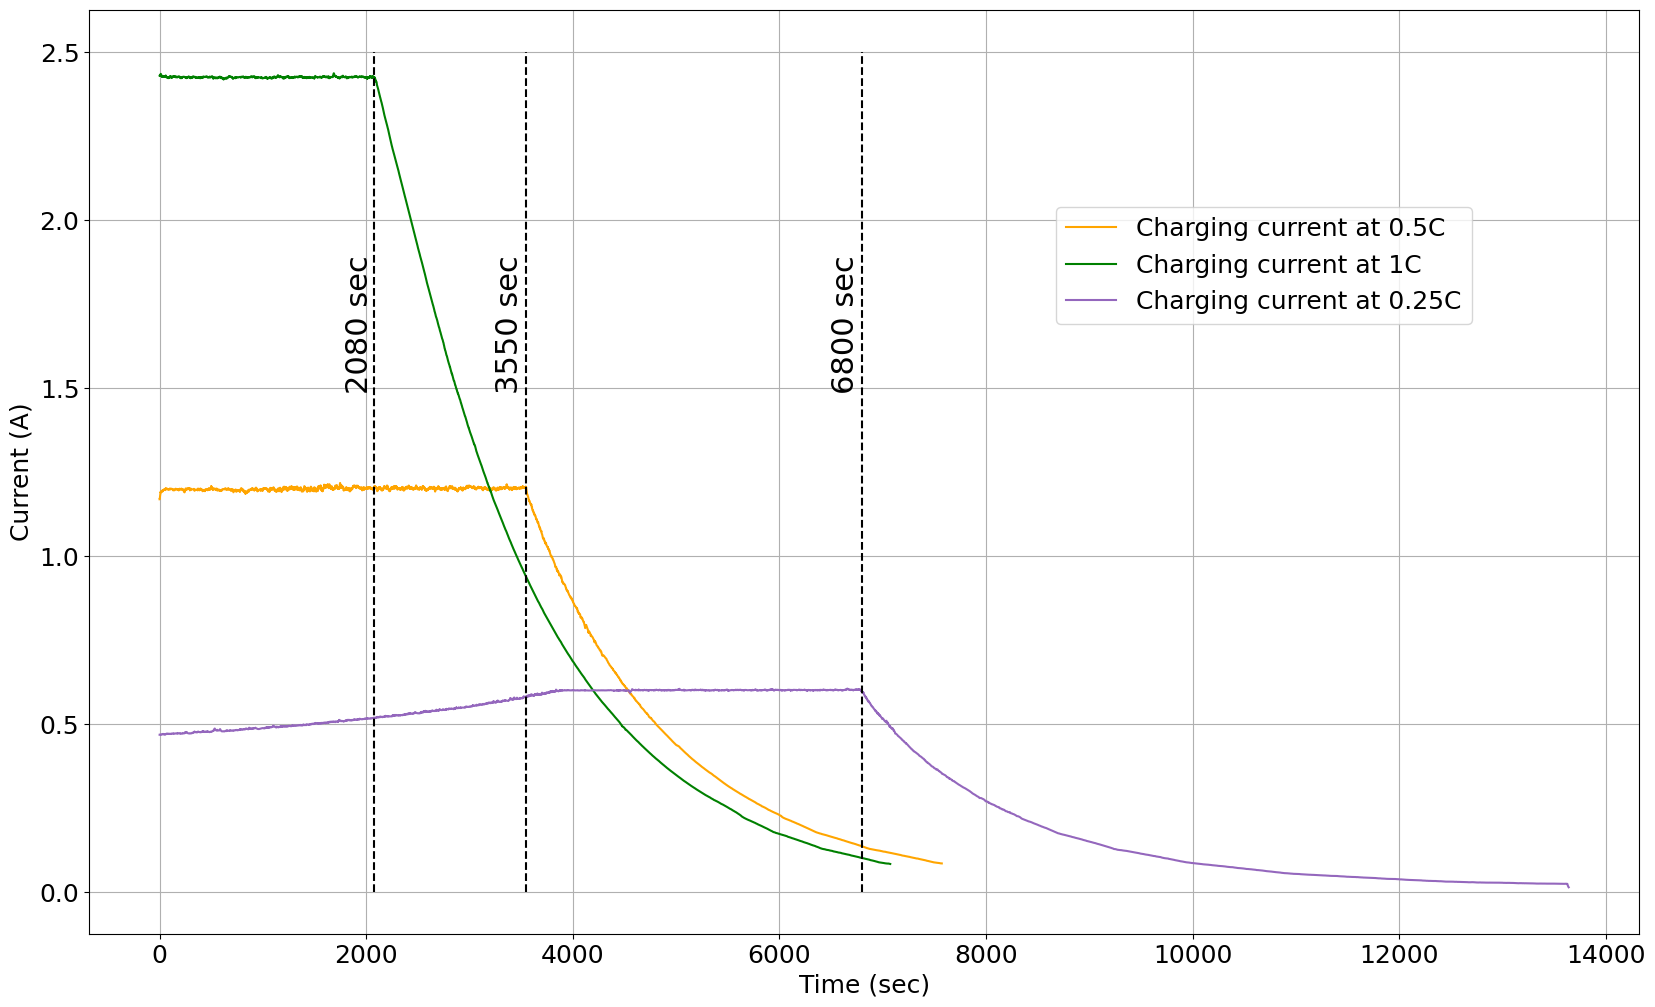

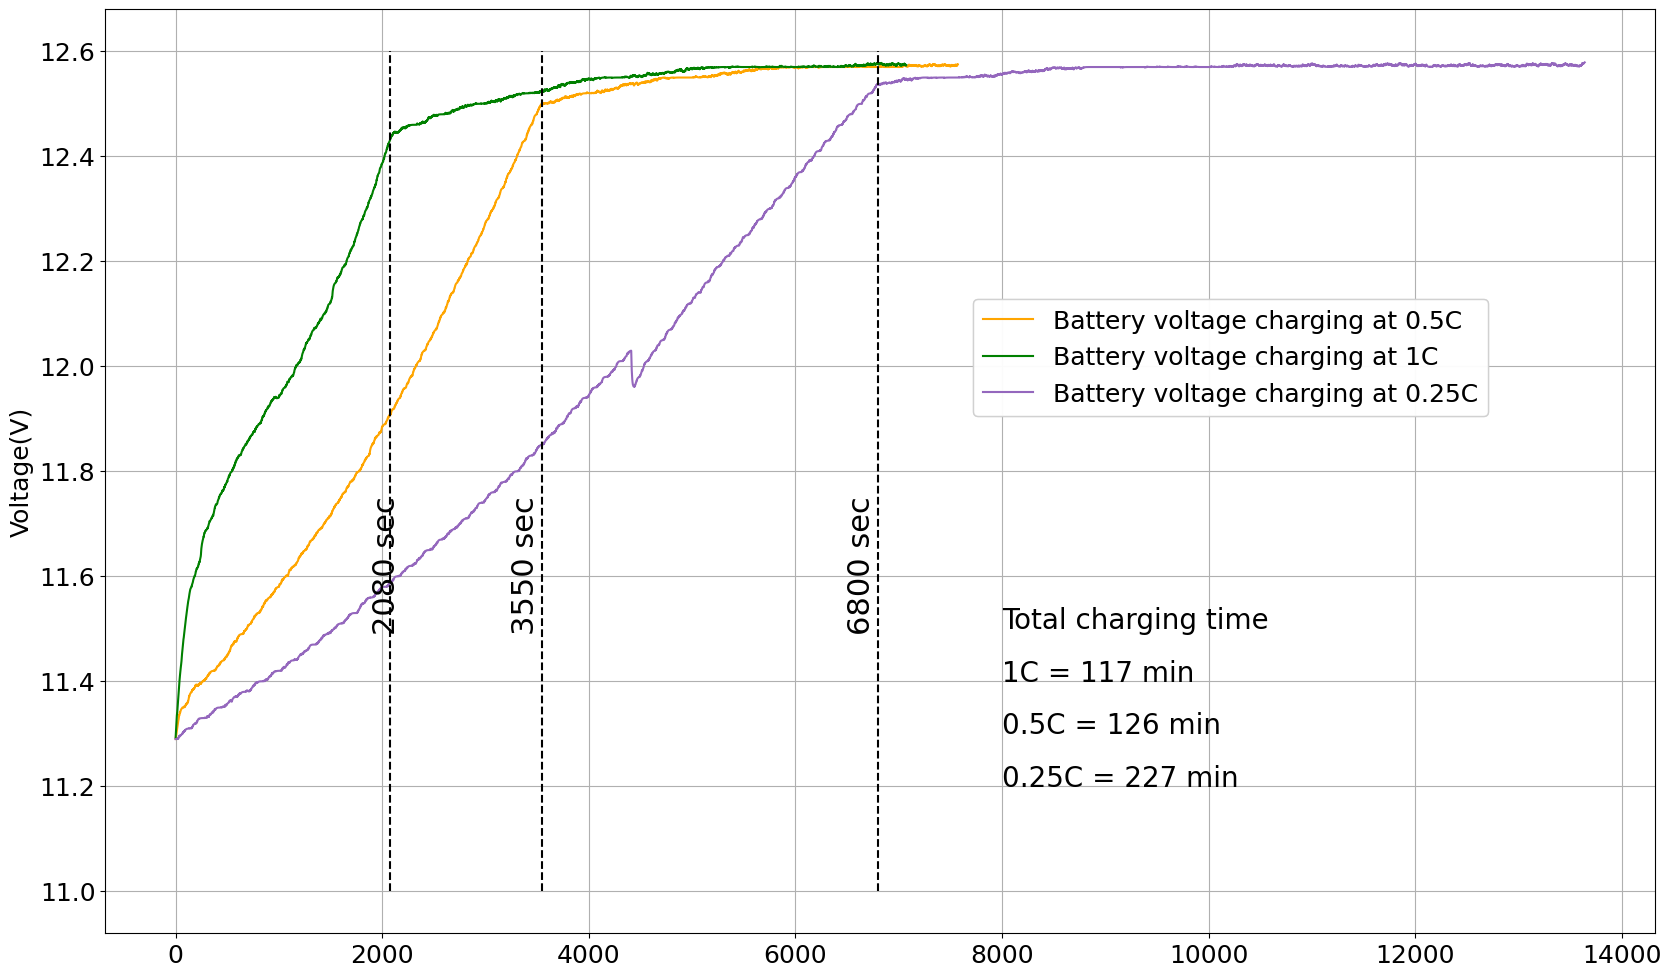

In [21]:
for i in range(df1C.size):
    if smoth_v[0] - smot_v[i] < 0.0001:
        eqvc = i
        break

for i in range(dfC.size):
    if smoth_v[0] - smotQ_v[i] < 0.0001:
        eqvq = i
        break


eqvt = smot_v[eqvc:]
eqvti = smot_i[eqvc:]

eqvtQ = smotQ_v[eqvq:]
eqvtiQ = smotQ_i[eqvq:]
t1 = eqvt.size/60
t2 = eqvtQ.size/60
t3 = smoth_v.size/60
print(eqvt[0:5])
print(eqvtQ[0:5])
print(smoth_v[0:5])
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(time0C5, smoth_i, label = 'Charging current at 0.5C', color = 'orange')
ax.plot(np.arange(1, eqvt.size+1, 1), eqvti, label = 'Charging current at 1C', color = 'green')
ax.plot(np.arange(1, eqvtQ.size+1, 1), eqvtiQ, label = 'Charging current at 0.25C', color = 'tab:purple')
ax.set_xlabel('Time (sec)', fontsize = 18)
ax.set_ylabel('Current (A)', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=18)
#ax.set_yticklabels(fontsize = 18)
ax.legend(bbox_to_anchor=(0.9, 0.8), fontsize = 18)
l3, = ax.plot(np.full(26, 2080), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(1800, 1.5, r'2080 sec', fontsize=22, rotation='vertical')
l4, = ax.plot(np.full(26, 3550), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(3250, 1.5, r'3550 sec', fontsize=22, rotation='vertical')
l6, = ax.plot(np.full(26, 6800), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(6500, 1.5, r'6800 sec', fontsize=22, rotation='vertical')
ax.grid(True)

fig2, vax = plt.subplots(figsize=(20,12))
p1, = vax.plot(time0C5, smoth_v, label = 'Battery voltage charging at 0.5C', color = 'orange')
#vax.plot(time1C, np.full(time1C.size, meanV1C), color = 'black', ls = '--')
vax.set_ylabel('Voltage(V)', fontsize = 18)
vax.tick_params(axis='both', which='major', labelsize=18)
#ax.subplot(122)
p2, = vax.plot(np.arange(1, eqvt.size+1, 1), eqvt, label = 'Battery voltage charging at 1C', color = 'green')
p3, = vax.plot(np.arange(1, eqvtQ.size+1, 1), eqvtQ, label = 'Battery voltage charging at 0.25C', color = 'Tab:purple')
#vax.plot(time0C5, np.full(time0C5.size, meanV05C), color = 'red', ls = '--')
leg1 = vax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.7), fontsize = 18)
vax.add_artist(leg1)
l9, = vax.plot(np.full(9, 2080), np.arange(11, 12.7, 0.2), ls = '--', color = 'black')
vax.text(1900, 11.5, r'2080 sec', fontsize=22, rotation='vertical')
l7, = vax.plot(np.full(9, 3550), np.arange(11, 12.7, 0.2), ls = '--', color = 'black')
vax.text(3250, 11.5, r'3550 sec', fontsize=22, rotation='vertical')
l8, = vax.plot(np.full(9, 6800), np.arange(11, 12.7, 0.2), ls = '--', color = 'black')
vax.text(6500, 11.5, r'6800 sec', fontsize=22, rotation='vertical')
vax.text(8000, 11.5, 'Total charging time', fontsize = 20)
vax.text(8000, 11.5-0.1, r'1C = %d min'%(t1), fontsize=20)
vax.text(8000, 11.5-0.2, r'0.5C = %d min'%(t3), fontsize=20)
vax.text(8000, 11.5-0.3, r'0.25C = %d min'%(t2), fontsize=20)
vax.grid(True)

#l1, = vax.plot(time1C, np.full(time1C.size, eqvt[1380]), color = 'red' , ls = '-.', label = 'Voltage of 1C charging at 700 sec = %.3f V'%eqvt[1380])
#l2, = vax.plot(time1C, np.full(time1C.size, smot_v[700]), color = 'black', ls = '-.', label = 'Voltage of 0.5C charging at 1380 sec = %.3f A'%smot_v[700])
#l3, = vax.plot(np.full(23, 700), np.arange(11.7, 12.8, 0.05), ls = '--', color = 'black', label = 'Constant curent time 1C = 700 sec')
#l4, = vax.plot(np.full(23, 1380), np.arange(11.7, 12.8, 0.05), ls = '--', color = 'red', label = 'Constant curent time 0.5C = 1380 sec')
#vax.legend(handles = [l3, l4, l1, l2], bbox_to_anchor=(0.3, 1.2), fontsize = 18)

plt.show()

C:\Users\Paru\AppData\Local\Temp\ipykernel_8392\2739561877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_8392\2739561877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_8392\2739561877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_8392\2739561877

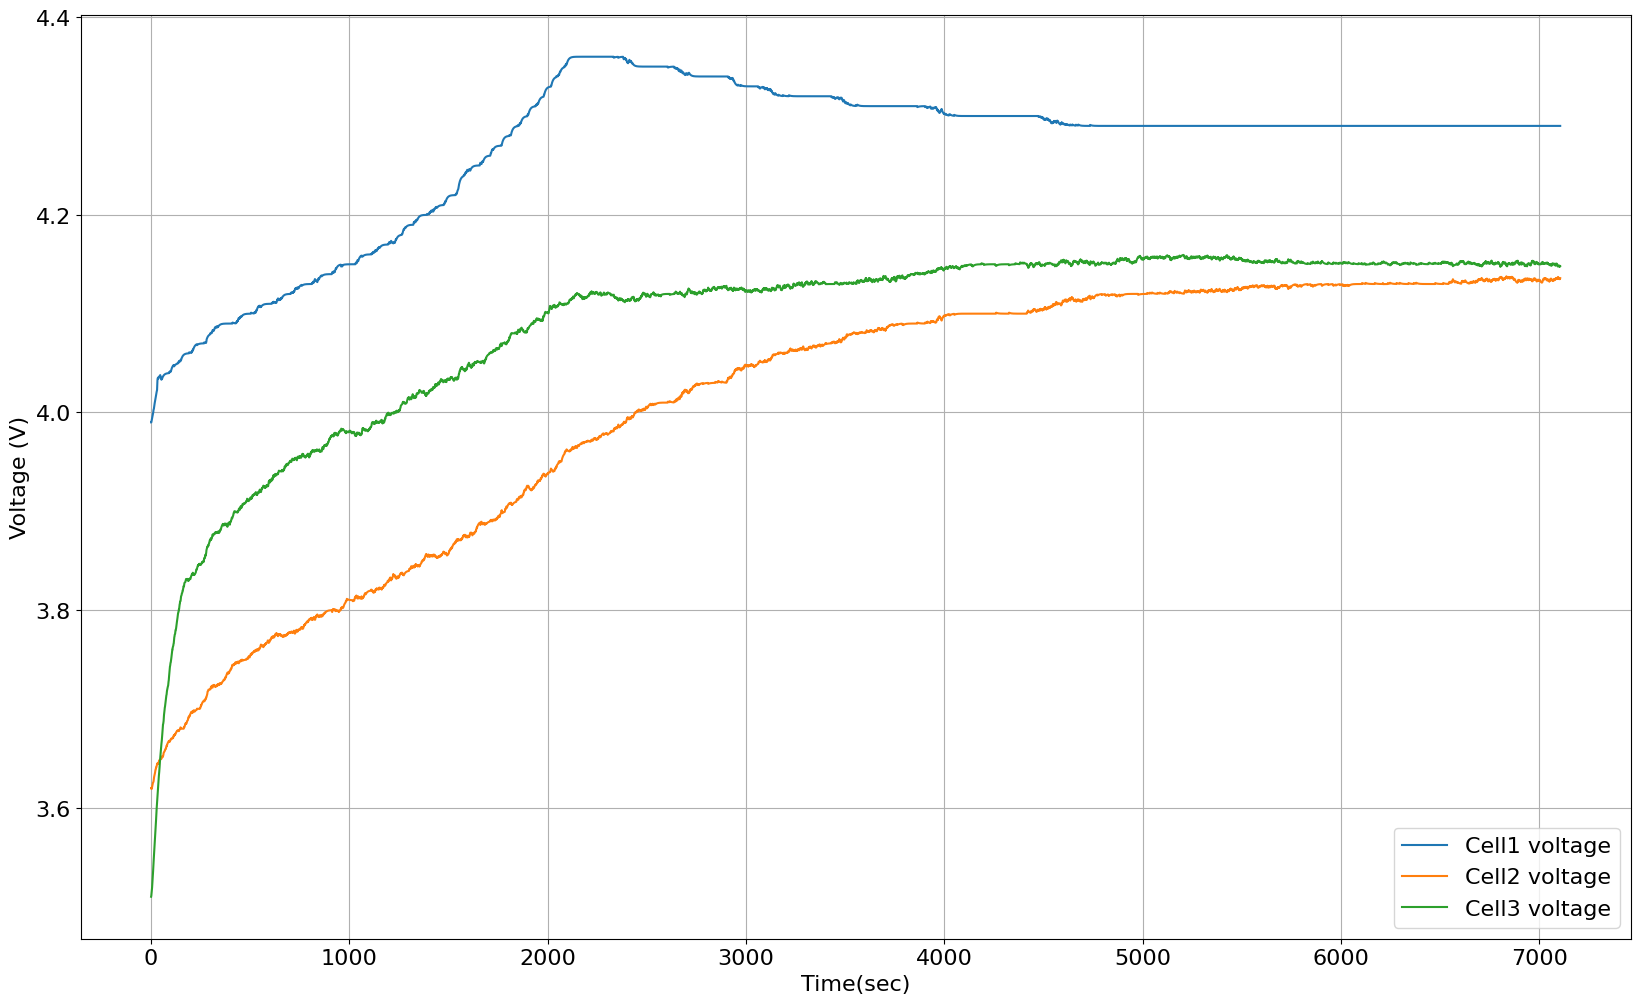

In [22]:
#Cell Voltages

c2 = df1C['Cell2(V)']
for i in range(3,time1C.size):
    if c2[i] < 6 :
        c2[i] = c2[i-1]

smot_c1 = []
smot_c2 = []
smot_c3 = []
smot_c1.append(df1C['Cell1(V)'].iloc[0])
smot_c2.append(c2[2])
smot_c3.append(df1C['V_+(V)'].iloc[0])


for i in range(1,df1C['CHARGING_I(A)'].size):
    tm1 = smot_c1[i - 1]
    tm1 = exp_smth(df1C['Cell1(V)'].iloc[i], tm1)
    smot_c1.append(tm1)

    temp = smot_c2[i- 1]
    temp = exp_smth(c2[i+2], temp)
    smot_c2.append(temp)

    temp = smot_c3[i - 1]
    temp = exp_smth(df1C['V_+(V)'].iloc[i], temp)
    smot_c3.append(temp)

smot_c1 = np.array(smot_c1)
smot_c2 = np.array(smot_c2)
smot_c3 = np.array(smot_c3)

smot_c3 = smot_c3 - smot_c2
smot_c2 = smot_c2 - smot_c1
av1 = smot_c1.mean()
av2 = smot_c2.mean()
av3 = smot_c3.mean()

fig, ax = plt.subplots(figsize=(20,12))        
ax.plot(time1C, smot_c1, label = "Cell1 voltage")
ax.plot(time1C, smot_c2, label = "Cell2 voltage")
ax.plot(time1C, smot_c3, label = "Cell3 voltage")
ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Voltage (V)', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True)
ax.legend(loc = 4, fontsize = 16)
plt.show()

29.336171076426407
37.78813082225046
26.946851456610023


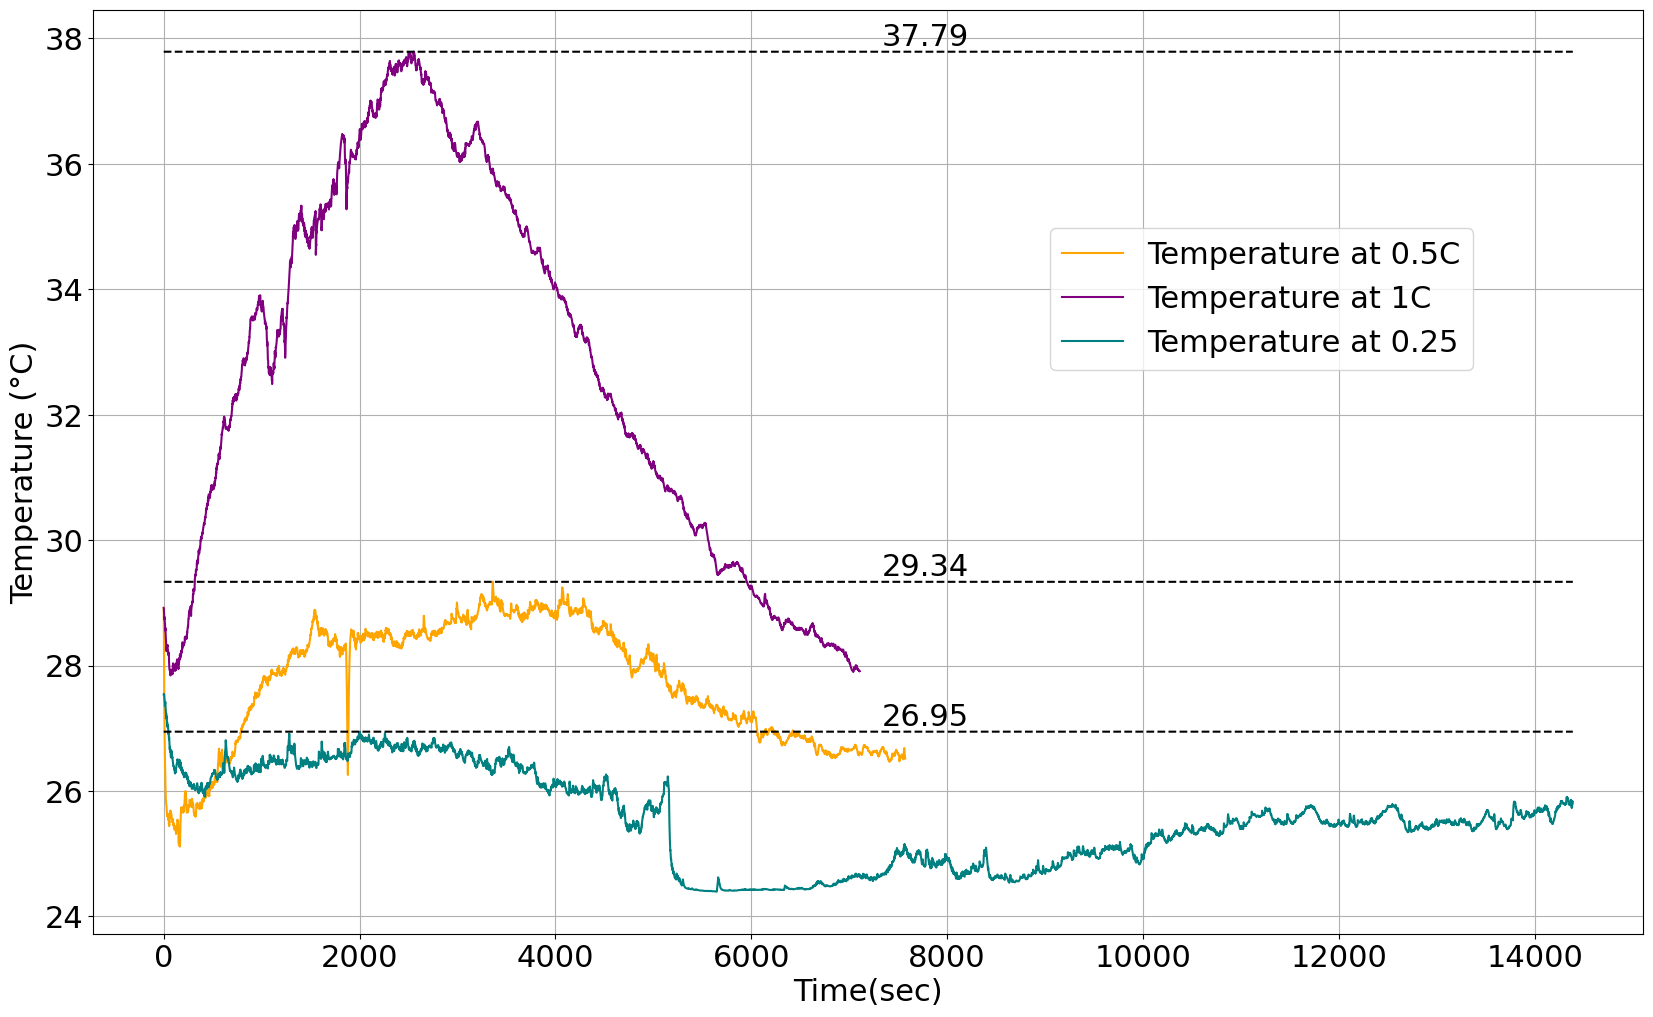

In [23]:
#Battery Charging Temperatures

max1 = smot_t.max()
max2 = smot_tt.max()
max3 = smotQ_t[300:].max()
print(max1)
print(max2)
print(max3)

fig2, dplt = plt.subplots(figsize=(20,12))
dplt.plot(time0C5, smot_t, label = 'Temperature at 0.5C', color = 'orange')
dplt.plot(time1C, smot_tt, label = 'Temperature at 1C', color = 'purple')
dplt.plot(timequatC, smotQ_t, label = 'Temperature at 0.25', color = 'teal')
l1, = dplt.plot(timequatC, np.full(timequatC.size, max1), color = 'black', ls = '--')
l2, = dplt.plot(timequatC, np.full(timequatC.size, max2), color = 'black', ls = '--')
l3, = dplt.plot(timequatC, np.full(timequatC.size, max3), color = 'black', ls = '--')
dplt.set_ylabel('Temperature (°C)', fontsize = 22)
dplt.set_xlabel('Time(sec)', fontsize = 22)
dplt.tick_params(axis='both', labelsize=22)
dplt.text(7330, max1 + 0.1, r'%.2f'%(max1), fontsize=22)
dplt.text(7330, max2 + 0.1, r'%.2f'%(max2), fontsize=22)
dplt.text(7330, max3 + 0.1, r'%.2f'%(max3), fontsize=22)
dplt.legend(bbox_to_anchor = (0.9, 0.78), fontsize = 22)
dplt.grid(True)

plt.show()

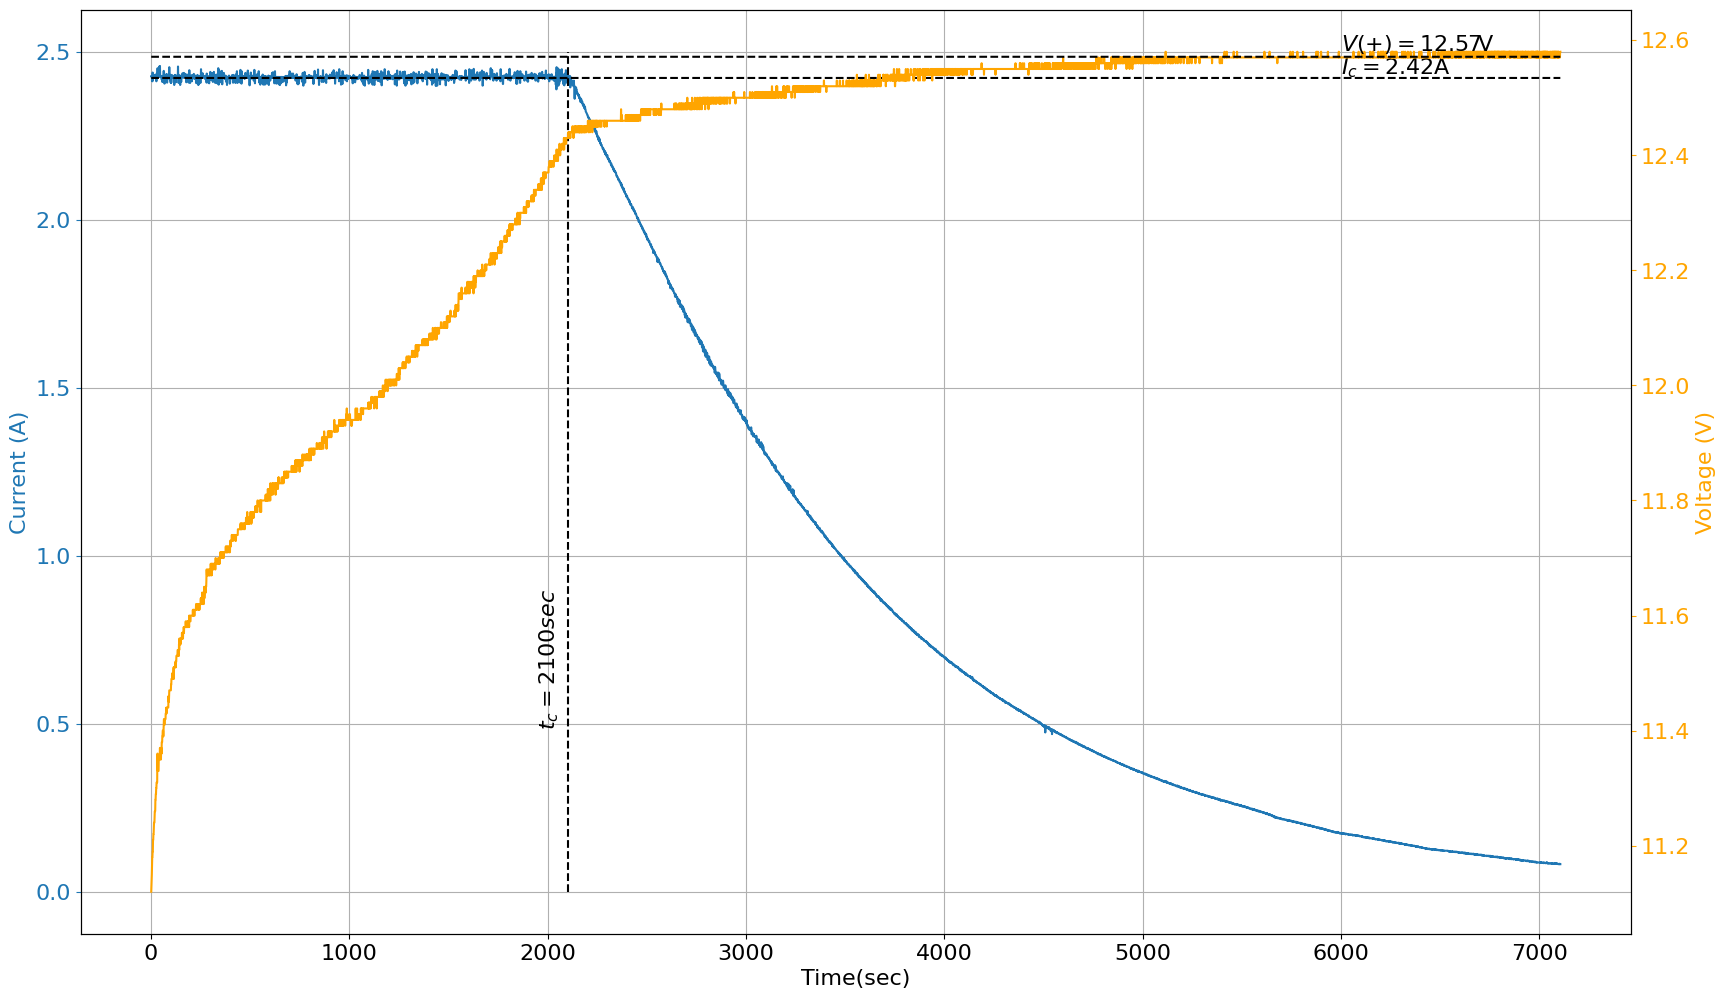

In [24]:
df2 = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD41.txt")

lin_rgn = 2100

meanI = df2['CHARGING_I(A)'].iloc[:lin_rgn].mean()
meanV = df2['V_+(V)'].loc[5000:].mean()

row2cpy = 0
for i in range(20):
    if df2['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1

init1C = df2.loc[0:row2cpy-1]
df2.drop([0,row2cpy-1], inplace = True)

time2 = np.arange(1, df2['TIME(hr:min:sec)'].size+1, 1)

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(time2, df2['CHARGING_I(A)'], label = 'Charging current')
ax.plot(time2, np.full(time2.size, meanI), ls = '--', color = 'black')
ax.text(6000, meanI+0.01, r'$I_c = $%.2fA'%(meanI), fontsize = 16)
ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16, color = '#1f77b4')
ax.tick_params(axis='y', which='major', labelsize=16, colors = '#1f77b4')
ax.tick_params(axis='x', which='major', labelsize=16)
ax.plot(np.full(6, 2100), np.arange(0, 2.6, 0.5), ls = '--', color = 'black')
ax.text(1950, 0.5, r'$t_c = 2100 sec$', fontsize=16, rotation='vertical')
#ax.set_yticklabels(fontsize = 16)
ax.grid(True)
dax = plt.twinx()
dax.plot(time2, df2['V_+(V)'], color = 'orange', label = 'Battery voltage')
dax.plot(time2, np.full(time2.size, meanV), color = 'black', ls = '--')
dax.text(6000, meanV+0.01, r'$V(+) = $%.2fV'%(meanV), fontsize = 16)
dax.set_ylabel('Voltage (V)', fontsize = 16, color = 'orange')
dax.tick_params(axis='y', labelsize=16, colors = 'orange')

plt.show()

37.78813082225046


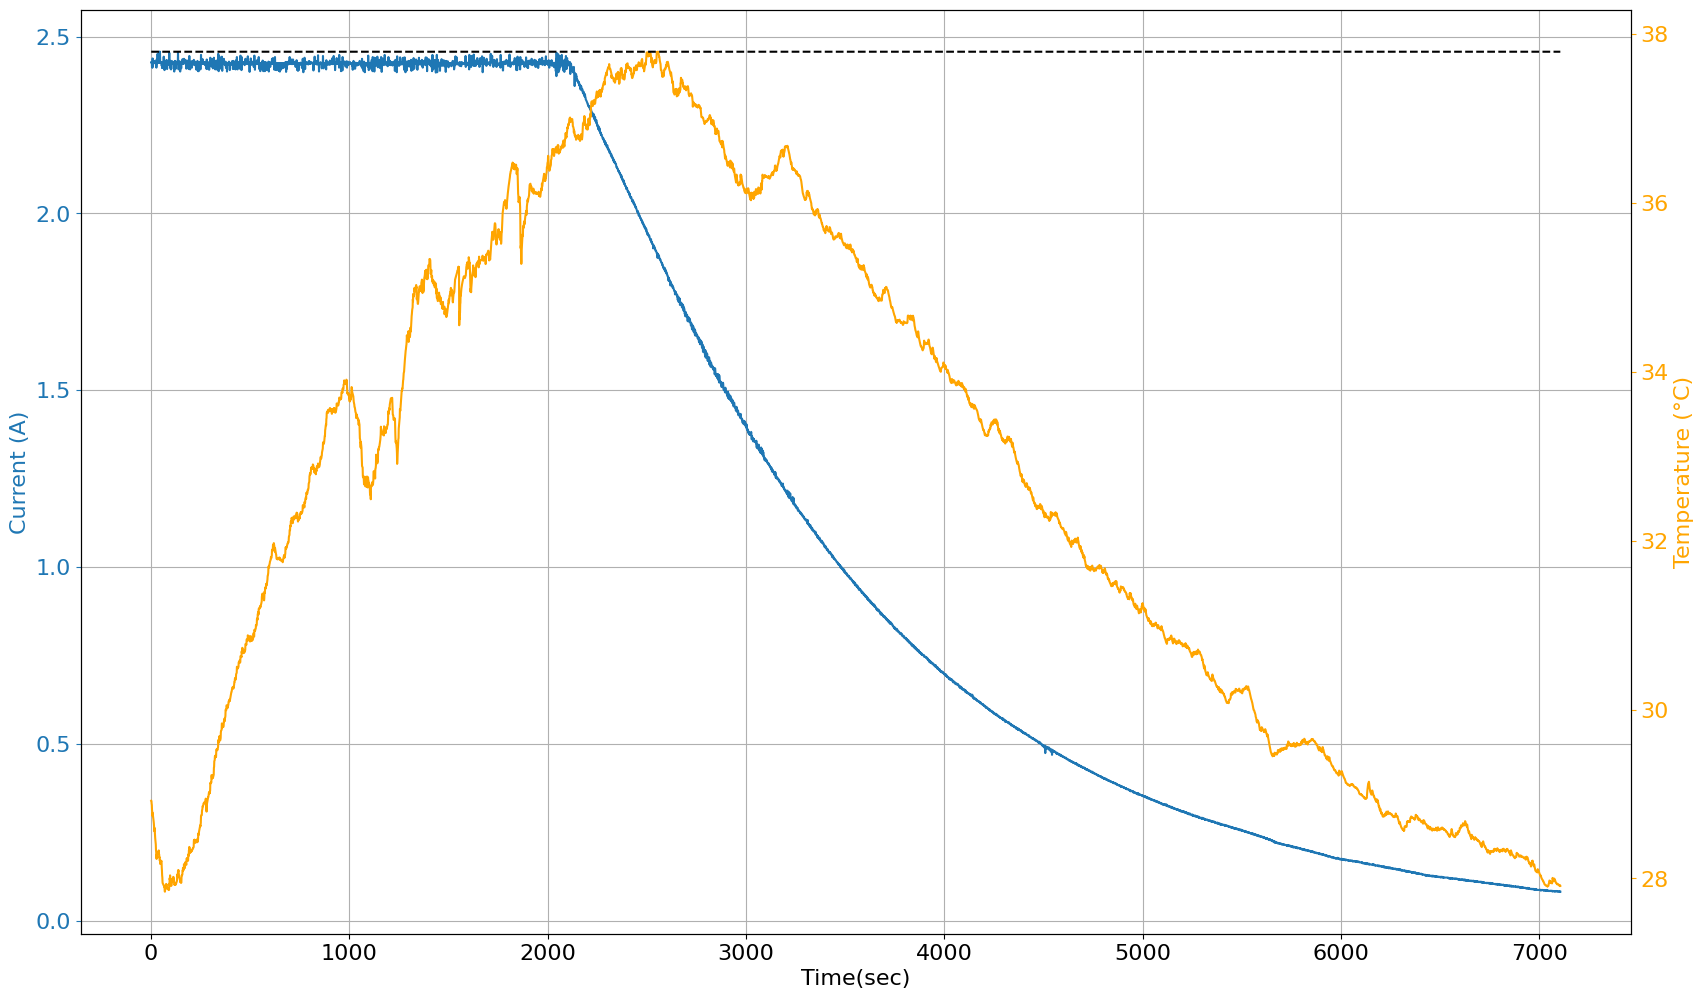

In [25]:
fig, ax = plt.subplots(figsize=(20,12))
maxT = smot_tt.max()
print(maxT)
ax.plot(time2, df2['CHARGING_I(A)'])
ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16, color = '#1f77b4')
ax.tick_params(axis='y', which='major', labelsize=16, colors = '#1f77b4')
ax.tick_params(axis='x', which='major', labelsize=16)
ax.grid(True)
dplt = plt.twinx()
dplt.plot(time2, smot_tt, color = 'orange')
dplt.plot(time2, np.full(time2.size, maxT), color = 'black', ls = '--')
dplt.set_ylabel('Temperature (°C)', fontsize = 16, color = 'orange')
dplt.tick_params(axis='y', labelsize=16, colors = 'orange')